# Create linear regression from scratch

## Import libraries

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

## Create perceptron class
This class will be responsible to build a machine learning model using perceptron.

In [52]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.bias = 0
        self.weights = None
        self.losses = []
        self.train_accuracies = []
        self.val_accuracies = []

        # For confusion matrix
        self.accuracies = []
        self.precision = []
        self.recall = []
        self.f1 = []

    def _print_accuracy(self, epoch, train_accuracy, val_accuracy):
        # Less than 100
        if self.n_iterations < 100:
            print(f"Epoch {epoch + 1}:")
            print(f"  Train accuracy: {train_accuracy}")
            print(f"  Val accuracy: {val_accuracy}")

        # More than or equals 100 and it's a multiple of 100, e.g. 1000
        elif self.n_iterations % 100 == 0:
            if (epoch + 1 % 100) == 0:  # Print every 100 iterations
                print(f"Epoch {epoch + 1}:")
                print(f"  Train accuracy: {train_accuracy}")
                print(f"  Val accuracy: {val_accuracy}")

        # More than 100 and it's not a multiple of 100, e.g. 121
        else:
            if self.n_iterations - epoch == 1:  # Print the last iteration
                print(f"Epoch {epoch + 1}:")
                print(f"  Train accuracy: {train_accuracy}")
                print(f"  Val accuracy: {val_accuracy}")
            elif (epoch + 1) % 100 == 0:  # Print every 100 iterations
                    print(f"Epoch {epoch + 1}:")
                    print(f"  Train accuracy: {train_accuracy}")
                    print(f"  Val accuracy: {val_accuracy}")

    def fit(self, X_train, y_train, X_val, y_val):
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)  # Initial weights = 0

        for epoch in range(self.n_iterations):
            # Implement SGD to update weights
            for i, x_i in X_train.iterrows():
                y_pred_train = self.predict(x_i)

                # Update if prediction and actual are different
                # if y_pred_train != y_train[i]:
                update = self.learning_rate * (y_train[i] - y_pred_train)

                # Values may exceed the maximum limit that can be handled by floating-point numbers.
                # So, implement numpy clip.
                self.weights += np.clip(update * x_i, -1e10, 1e10)
                self.bias += np.clip(update, -1e10, 1e10)

            y_pred_train = self.predict(X_train)
            y_pred_val = self.predict(X_val)

            train_accuracy = self.accuracy_score(y_train, y_pred_train)
            val_accuracy = self.accuracy_score(y_val, y_pred_val)

            self.train_accuracies.append(train_accuracy)
            self.val_accuracies.append(val_accuracy)

            self._print_accuracy(epoch, train_accuracy, val_accuracy)

    def predict(self, X):
        z = np.dot(X, self.weights.T) + self.bias
        return np.where(z >= 0, 1, 0)

    def accuracy_score(self, y_actual, y_pred):
        return np.mean(y_actual == y_pred)

    def plot_accuracy(self):
        plt.figure(figsize=(10, 5))
        plt.plot(range(1, len(self.train_accuracies) + 1), self.train_accuracies, label="Training Accuracy")
        plt.plot(range(1, len(self.val_accuracies) + 1), self.val_accuracies, label="Validation Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.title("Training Accuracy over Epochs")
        plt.legend()
        plt.show()

    def sum_confusion_matrix(self, y_actual, y_pred):
        # Confusion matrix calculation
        TP = np.sum((y_actual == 1) & (y_pred == 1))  # True Positives
        FP = np.sum((y_actual == 0) & (y_pred == 1))  # False Positives
        FN = np.sum((y_actual == 1) & (y_pred == 0))  # False Negatives
        TN = np.sum((y_actual == 0) & (y_pred == 0))  # True Negatives

        return pd.DataFrame({"1": [TP , FN], "0": [FP, TN]}, index=["1", "0"])

    def confusion_matrix(self, title, X, y):
        y_pred = model.predict(X)
        cm = model.sum_confusion_matrix(y, y_pred)

        plt.figure(figsize=(10, 6))
        ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        ax.xaxis.tick_top()

        plt.title(title)
        plt.xlabel("Predicted label")
        plt.ylabel("True label")

        ax.xaxis.set_label_position("top")

        plt.show()

## Create create helper functions (static functions)

In [53]:
def generate_random_dataset(n_samples=1000, n_features=3, seed=None, noise=0.1):
    """Generate a random DataFrame."""
    if seed:
      np.random.seed(seed)

    X = np.random.randn(n_samples, n_features)
    weights = np.random.randn(n_features)
    y = np.random.randint(0, 2, n_samples)

    df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(n_features)])
    df["target"] = y

    return df


def train_test_split(X, y, test_size=0.2, seed=None):
    """Split arrays or matrices into random train and test subsets."""
    if seed:
        np.random.seed(seed)

    n_samples = len(X.values)
    n_test = int(n_samples * test_size)
    indices = np.random.permutation(n_samples)
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]

    X_train, X_val = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_val = y.iloc[train_indices], y.iloc[test_indices]

    return X_train, y_train, X_val, y_val

# Test using a dummy dataset

## Train

In [54]:
# Generate a dummy dataset for training
df_dummy = generate_random_dataset()

# Prepare data
X_dummy = df_dummy.drop("target", axis=1)
y_dummy = df_dummy["target"]

X_train_dummy, y_train_dummy, X_val_dummy, y_val_dummy = train_test_split(X_dummy, y_dummy)

# Create and train the model
model = Perceptron(learning_rate=0.01, n_iterations=50)
model.fit(X_train_dummy, y_train_dummy, X_val_dummy, y_val_dummy)

Epoch 1:
  Train accuracy: 0.4725
  Val accuracy: 0.475
Epoch 2:
  Train accuracy: 0.48875
  Val accuracy: 0.505
Epoch 3:
  Train accuracy: 0.50625
  Val accuracy: 0.54
Epoch 4:
  Train accuracy: 0.49
  Val accuracy: 0.545
Epoch 5:
  Train accuracy: 0.49875
  Val accuracy: 0.53
Epoch 6:
  Train accuracy: 0.49375
  Val accuracy: 0.53
Epoch 7:
  Train accuracy: 0.49
  Val accuracy: 0.52
Epoch 8:
  Train accuracy: 0.4725
  Val accuracy: 0.495
Epoch 9:
  Train accuracy: 0.48375
  Val accuracy: 0.505
Epoch 10:
  Train accuracy: 0.48375
  Val accuracy: 0.515
Epoch 11:
  Train accuracy: 0.4825
  Val accuracy: 0.495
Epoch 12:
  Train accuracy: 0.485
  Val accuracy: 0.52
Epoch 13:
  Train accuracy: 0.4875
  Val accuracy: 0.495
Epoch 14:
  Train accuracy: 0.47875
  Val accuracy: 0.525
Epoch 15:
  Train accuracy: 0.48625
  Val accuracy: 0.5
Epoch 16:
  Train accuracy: 0.48875
  Val accuracy: 0.525
Epoch 17:
  Train accuracy: 0.48375
  Val accuracy: 0.5
Epoch 18:
  Train accuracy: 0.4875
  Val acc

## Plot the result

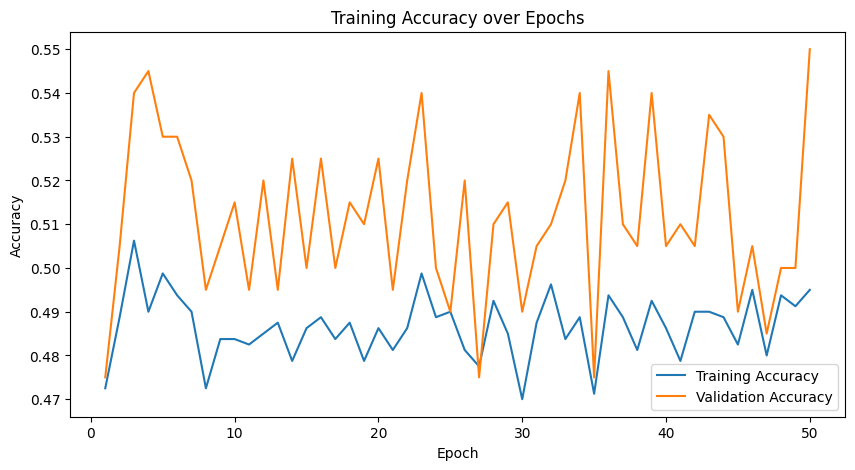

In [55]:
model.plot_accuracy()

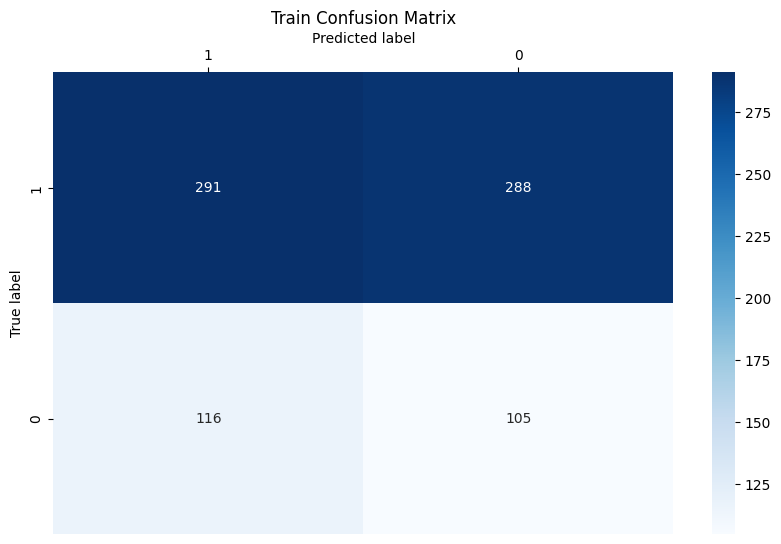

In [56]:
model.confusion_matrix("Train Confusion Matrix", X_train_dummy, y_train_dummy)

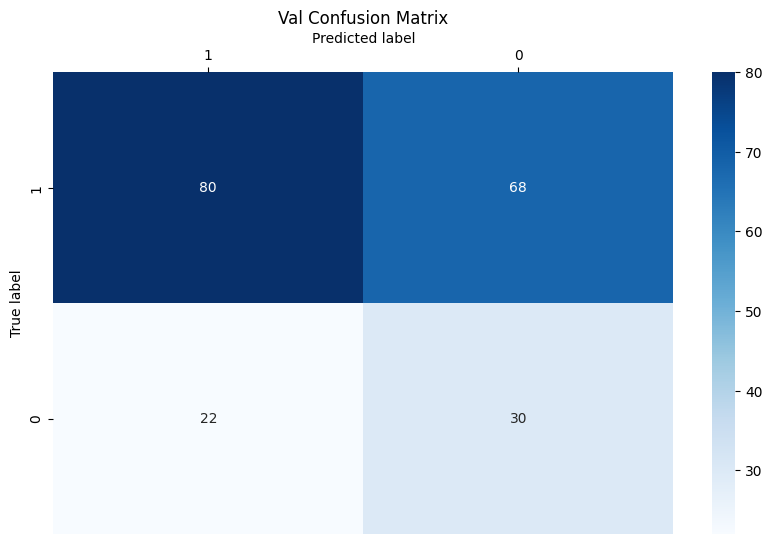

In [57]:
model.confusion_matrix("Val Confusion Matrix", X_val_dummy, y_val_dummy)

# Test using a real dataset

In [58]:
%%bash

# Check if the dataset already exists
if test -e "titanic-machine-learning-from-disaster.zip"; then
    echo "Dataset already exists."
else
    kaggle datasets download -d shuofxz/titanic-machine-learning-from-disaster
fi

Dataset already exists.


In [59]:
%%bash

rm *.csv
unzip titanic-machine-learning-from-disaster

Archive:  titanic-machine-learning-from-disaster.zip
  inflating: test.csv                
  inflating: train.csv               


In [60]:
pd.options.display.max_columns = None

df = pd.read_csv("train.csv")

## EDA

In [61]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [63]:
df.describe(include=["object"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [64]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
# Check if the class is balance/imbalance
df.value_counts("Survived")

,count
Survived,
0,549
1,342


In [66]:
print(f"0 -> {round(df.value_counts('Survived')[0] / len(df), 2)}")
print(f"1 -> {round(df.value_counts('Survived')[1] / len(df), 2)}")

0 -> 0.62
1 -> 0.38


In [67]:
non_features = ["PassengerId", "Name", "Ticket", "Embarked", "Survived"]
X = df.drop(columns=non_features)
y = df["Survived"]

In [68]:
X_train, y_train, X_val, y_val = train_test_split(X, y)

In [69]:
X_train.isna().sum()

,0
Pclass,0
Sex,0
Age,140
SibSp,0
Parch,0
Fare,0
Cabin,545


In [70]:
X_val.isna().sum()

,0
Pclass,0
Sex,0
Age,37
SibSp,0
Parch,0
Fare,0
Cabin,142


In [71]:
non_numerical_columns = [col for col in X_train.columns if X_train[col].dtype == "object"]
numerical_columns = [col for col in X_train.columns if X_train[col].dtype != "object"]

In [72]:
non_numerical_columns

['Sex', 'Cabin']

In [73]:
numerical_columns

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

## Test without preprocessing
No preprocessing can be in interpreted: minimize preprocessing to the bare essentials to avoid breaking the code/error during training.

It includes handling categorical data and missing values. Both will be just removed.

In [74]:
# Remove categorical columns
X_train_no_preprocess = X_train.drop(columns=non_numerical_columns)
X_val_no_preprocess = X_val.drop(columns=non_numerical_columns)

In [75]:
X_train_no_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
Index: 713 entries, 850 to 352
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  713 non-null    int64  
 1   Age     573 non-null    float64
 2   SibSp   713 non-null    int64  
 3   Parch   713 non-null    int64  
 4   Fare    713 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 33.4 KB


In [76]:
X_val_no_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 118 to 745
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  178 non-null    int64  
 1   Age     141 non-null    float64
 2   SibSp   178 non-null    int64  
 3   Parch   178 non-null    int64  
 4   Fare    178 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 8.3 KB


In [77]:
# Remove columns with missing values
columns_with_missing = [col for col in X_train_no_preprocess.columns if X_train_no_preprocess[col].isnull().any()]

X_train_no_preprocess.drop(columns_with_missing, axis=1, inplace=True)
X_val_no_preprocess.drop(columns_with_missing, axis=1, inplace=True)

In [78]:
X_train_no_preprocess.isna().sum()

,0
Pclass,0
SibSp,0
Parch,0
Fare,0


In [79]:
X_val_no_preprocess.isna().sum()

,0
Pclass,0
SibSp,0
Parch,0
Fare,0


### Train

In [80]:
# Init new model
model = Perceptron(learning_rate=0.01, n_iterations=50)
model.fit(X_train_no_preprocess, y_train, X_val_no_preprocess, y_val)

Epoch 1:
  Train accuracy: 0.6143057503506312
  Val accuracy: 0.6235955056179775
Epoch 2:
  Train accuracy: 0.39691444600280507
  Val accuracy: 0.4044943820224719
Epoch 3:
  Train accuracy: 0.39691444600280507
  Val accuracy: 0.4044943820224719
Epoch 4:
  Train accuracy: 0.39691444600280507
  Val accuracy: 0.4044943820224719
Epoch 5:
  Train accuracy: 0.6143057503506312
  Val accuracy: 0.6235955056179775
Epoch 6:
  Train accuracy: 0.6185133239831697
  Val accuracy: 0.6235955056179775
Epoch 7:
  Train accuracy: 0.39691444600280507
  Val accuracy: 0.4044943820224719
Epoch 8:
  Train accuracy: 0.39691444600280507
  Val accuracy: 0.4044943820224719
Epoch 9:
  Train accuracy: 0.6143057503506312
  Val accuracy: 0.6235955056179775
Epoch 10:
  Train accuracy: 0.39691444600280507
  Val accuracy: 0.4044943820224719
Epoch 11:
  Train accuracy: 0.39691444600280507
  Val accuracy: 0.4044943820224719
Epoch 12:
  Train accuracy: 0.6143057503506312
  Val accuracy: 0.6235955056179775
Epoch 13:
  Train 

### Plot the result

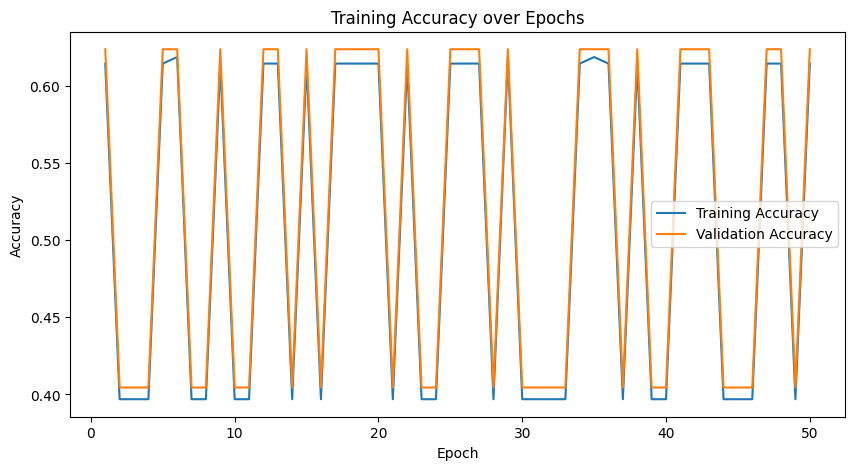

In [81]:
model.plot_accuracy()

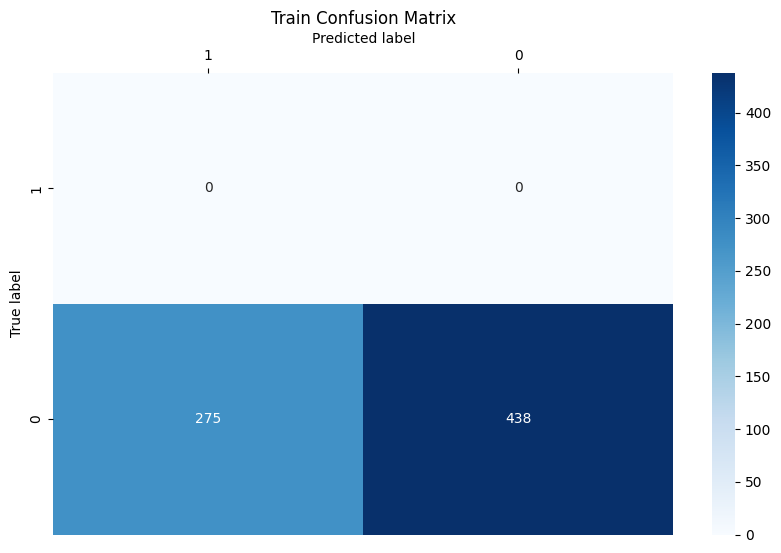

In [82]:
model.confusion_matrix("Train Confusion Matrix", X_train_no_preprocess, y_train)

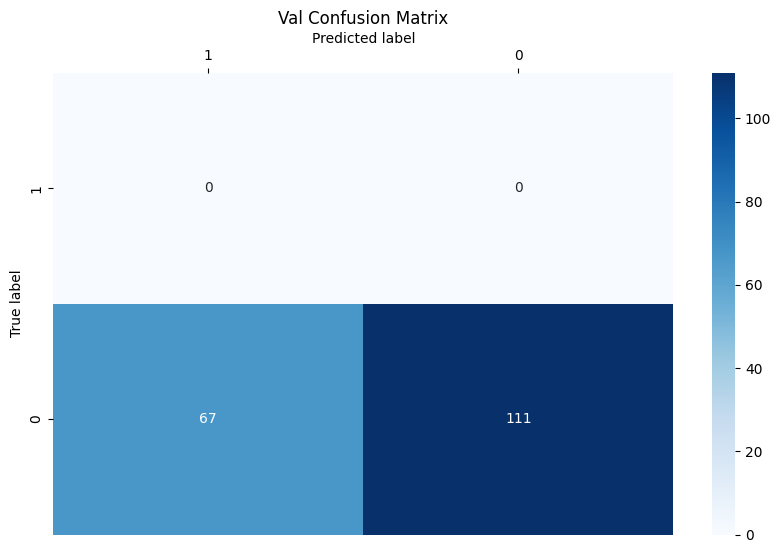

In [83]:
model.confusion_matrix("Val Confusion Matrix", X_val_no_preprocess, y_val)

## Test with preprocessing

In [84]:
X_train_preprocess = X_train.copy()
X_val_preprocess = X_val.copy()

#### Handle non-numerical columns

In [85]:
# Most of Cabin values are missing. The column will be removed.
X_train_preprocess.drop(["Cabin"], axis=1, inplace=True)
X_val_preprocess.drop(["Cabin"], axis=1, inplace=True)

In [86]:
# Apply binary encoding for Sex column. Male: 1, female: 0.
X_train_preprocess["Sex"] = X_train_preprocess["Sex"].map({"male": 1, "female": 0})
X_val_preprocess["Sex"] = X_val_preprocess["Sex"].map({"male": 1, "female": 0})

In [87]:
X_train_preprocess.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare
count,713.00000,713.000000,573.000000,713.000000,713.000000,713.000000
mean,2.28331,0.645161,29.985742,0.517532,0.380084,32.514282
std,0.84532,0.478800,14.253698,1.088778,0.834641,50.634874
min,1.00000,0.000000,0.670000,0.000000,0.000000,0.000000
25%,1.00000,0.000000,21.000000,0.000000,0.000000,7.925000
50%,3.00000,1.000000,29.000000,0.000000,0.000000,14.500000
75%,3.00000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.00000,1.000000,74.000000,8.000000,6.000000,512.329200


In [88]:
X_val_preprocess.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare
count,178.000000,178.000000,141.000000,178.000000,178.000000,178.000000
mean,2.410112,0.657303,28.534326,0.544944,0.387640,30.962170
std,0.792129,0.475950,15.585301,1.159925,0.681693,45.842128
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,19.000000,0.000000,0.000000,7.854200
50%,3.000000,1.000000,26.000000,0.000000,0.000000,13.429150
75%,3.000000,1.000000,36.000000,1.000000,1.000000,28.725000
max,3.000000,1.000000,80.000000,8.000000,3.000000,262.375000


### Handle missing values
Age might be a good feature to predict Survived, but it has many missing columns.

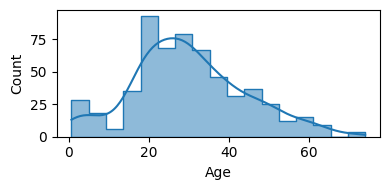

In [89]:
plt.figure(figsize=(4, 2))
plotnumber = 1
sns.histplot(X_train_preprocess["Age"], element="step", kde=True)
plt.tight_layout()
plt.show()

In [90]:
# Applying mean imputation.
X_train_preprocess["Age"].fillna(X_train_preprocess["Age"].mean(), inplace=True)
X_val_preprocess["Age"].fillna(X_val_preprocess["Age"].mean(), inplace=True)

### Show correlations
After convert all non numerical columns to numeric, show the correlations to know which features that are good for training.

In [91]:
combined_train_preprocess = pd.concat([X_train_preprocess, y_train], axis=1)
combined_val_preprocess = pd.concat([X_val_preprocess, y_val], axis=1)

In [92]:
# Show correlations. Features that have low correlations (except age) will be removed.
correlation_matrix = combined_train_preprocess.corr()
correlation_matrix.style.background_gradient(cmap="coolwarm")

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
Pclass,1.000000,0.113395,-0.357603,0.084631,0.040257,-0.527557,-0.330560
Sex,0.113395,1.000000,0.058327,-0.110635,-0.227877,-0.171711,-0.520425
Age,-0.357603,0.058327,1.000000,-0.238775,-0.141696,0.108827,-0.054022
SibSp,0.084631,-0.110635,-0.238775,1.000000,0.406090,0.162876,-0.032630
Parch,0.040257,-0.227877,-0.141696,0.406090,1.000000,0.201387,0.050012
Fare,-0.527557,-0.171711,0.108827,0.162876,0.201387,1.000000,0.256003
Survived,-0.330560,-0.520425,-0.054022,-0.032630,0.050012,0.256003,1.000000


In [93]:
low_correlation_columns = correlation_matrix[correlation_matrix["Survived"].abs() < 0.3].index.values.tolist()
low_correlation_columns.remove("Age")
low_correlation_columns

['SibSp', 'Parch', 'Fare']

In [94]:
combined_train_preprocess.drop(columns=low_correlation_columns, axis=1, inplace=True)
combined_val_preprocess.drop(columns=low_correlation_columns, axis=1, inplace=True)

By removing low correlation columns, the dataset won't have any missing values.

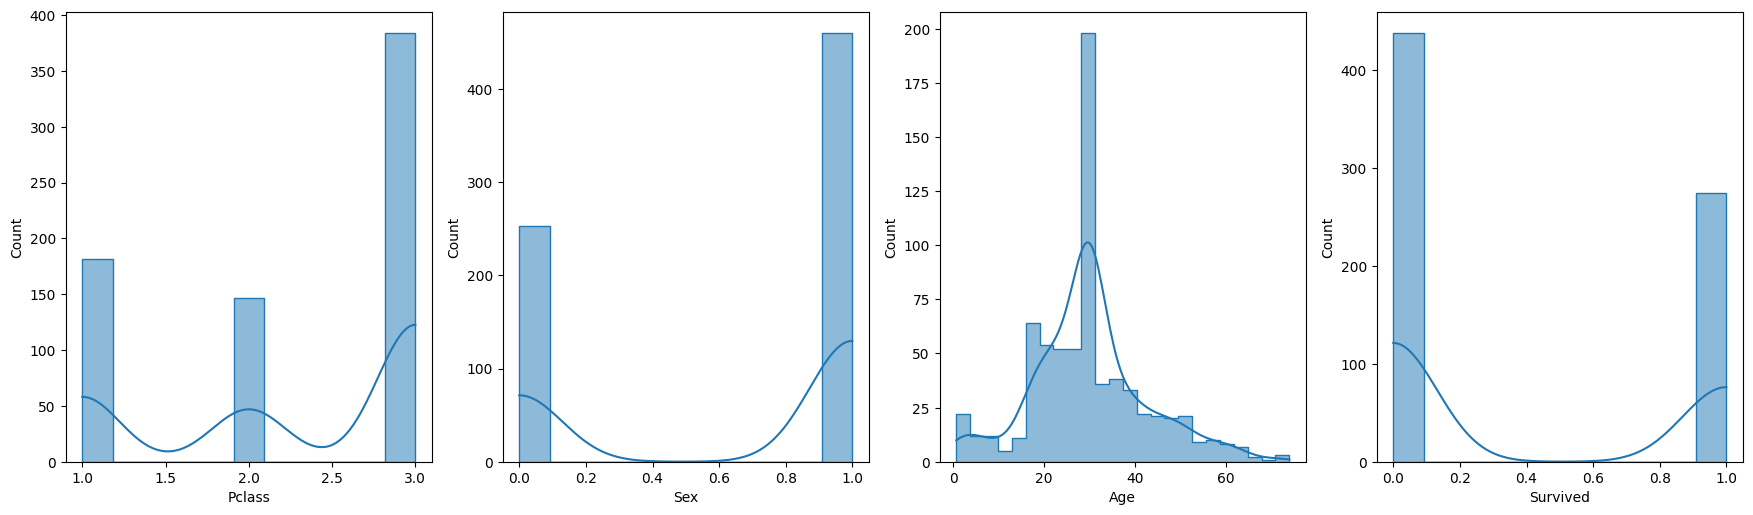

In [95]:
# See the distribution of all columns.
plt.figure(figsize=(22, 15))
plotnumber = 1

for column in combined_train_preprocess.columns:
    plt.subplot(3, 5, plotnumber)
    sns.histplot(combined_train_preprocess[column], element="step", kde=True)

    plotnumber += 1

plt.tight_layout()
plt.show()

### Train

In [96]:
X_train_clean = combined_train_preprocess.iloc[:, :-1]  # All columns except the last one
y_train_clean = combined_train_preprocess.iloc[:, -1]  # Last column (y)

X_val_clean = combined_val_preprocess.iloc[:, :-1]
y_val_clean = combined_val_preprocess.iloc[:, -1]

In [97]:
# Init new model
model = Perceptron(learning_rate=0.01, n_iterations=50)
model.fit(X_train_clean, y_train_clean, X_val_clean, y_val_clean)

Epoch 1:
  Train accuracy: 0.6143057503506312
  Val accuracy: 0.6235955056179775
Epoch 2:
  Train accuracy: 0.6143057503506312
  Val accuracy: 0.6235955056179775
Epoch 3:
  Train accuracy: 0.761570827489481
  Val accuracy: 0.7752808988764045
Epoch 4:
  Train accuracy: 0.7643758765778401
  Val accuracy: 0.7921348314606742
Epoch 5:
  Train accuracy: 0.6129032258064516
  Val accuracy: 0.6235955056179775
Epoch 6:
  Train accuracy: 0.6157082748948106
  Val accuracy: 0.6348314606741573
Epoch 7:
  Train accuracy: 0.6185133239831697
  Val accuracy: 0.6404494382022472
Epoch 8:
  Train accuracy: 0.6227208976157083
  Val accuracy: 0.6460674157303371
Epoch 9:
  Train accuracy: 0.6157082748948106
  Val accuracy: 0.6404494382022472
Epoch 10:
  Train accuracy: 0.635343618513324
  Val accuracy: 0.651685393258427
Epoch 11:
  Train accuracy: 0.6437587657784011
  Val accuracy: 0.6629213483146067
Epoch 12:
  Train accuracy: 0.7559607293127629
  Val accuracy: 0.7808988764044944
Epoch 13:
  Train accuracy: 

### Plot the result

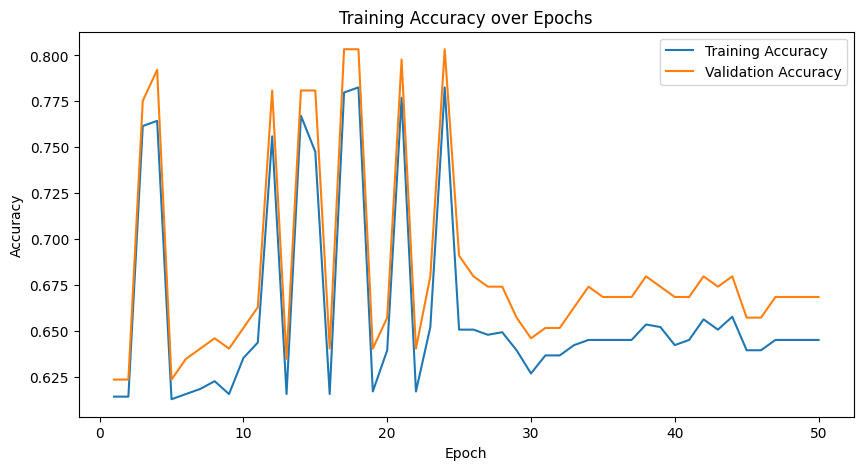

In [98]:
model.plot_accuracy()

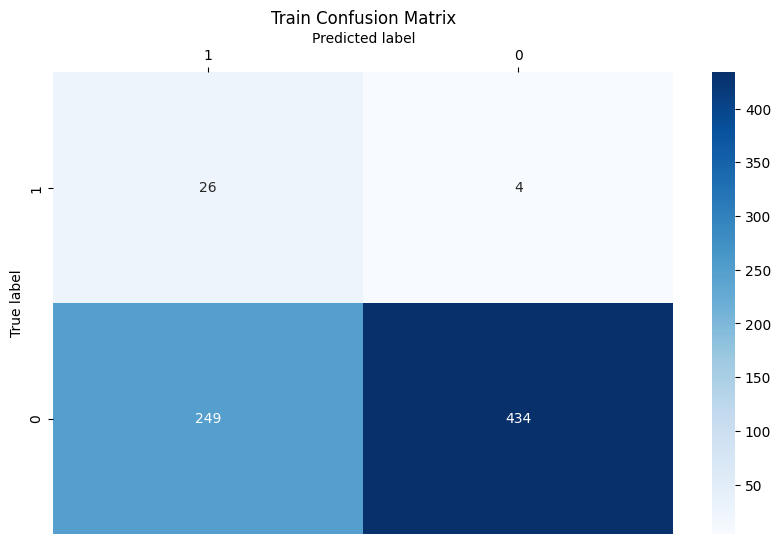

In [99]:
model.confusion_matrix("Train Confusion Matrix", X_train_clean, y_train_clean)

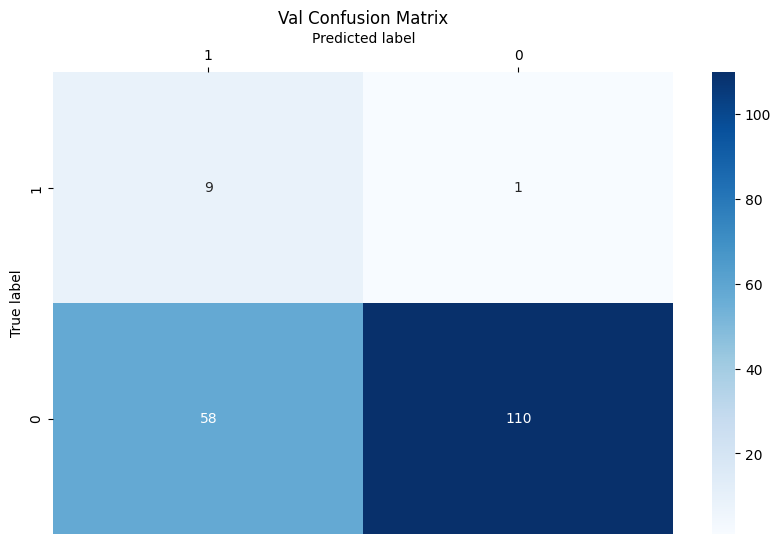

In [100]:
model.confusion_matrix("Val Confusion Matrix", X_val_clean, y_val_clean)

## Conclusion
Preprocessing is a crucial step in most machine learning workflows, as it helps clean and structure the data for better model performance. However, in this particular experiment, there was no significant difference in performance observed whether preprocessing was applied or not. This could be due to the inherent quality or simplicity of the dataset, which may not have required extensive preprocessing for the model to achieve optimal results. It's important to note, though, that in many cases, preprocessing can still enhance model accuracy, reduce noise, and handle missing or imbalanced data.